A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the players, the clubs they are currently playing for and various performance measures.
There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.

Data:
The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. The files provided are as follows: 
fifa.csv – data file.
fifa_ variable_information.csv - information on individual variables.

* ID: unique id for every player
* Name: name
* Age: age
* Photo: url to the player's photo
* Nationality: nationality
* Flag: url to players's country flag
* Overall: overall rating
* Potential: potential rating
* Club: current club
* Club Logo: url to club logo
* Value: current market value
* Wage: current wage
* Preferred Foot: left/right
* International Reputation: rating on scale of 5
* Weak Foot: rating on scale of 5
* Skill Moves: rating on scale of 5
* Work Rate: attack work rate/defence work rate
* Body Type: body type of player
* Position: position on the pitch
* Jersey Number: jersey number
* Joined: joined date
* Loaned From: club name if applicable
* Contract Valid Until: contract end date
* Height: height of the player
* Weight: weight of the player
* Crossing :rating on scale of 100
* Finishing: rating on scale of 100
* HeadingAccuracy: rating on scale of 100
* ShortPassing: rating on scale of 100
* Volleys: rating on scale of 100
* Dribbling: rating on scale of 100
* Curve: rating on scale of 100
* FKAccuracy: rating on scale of 100
* LongPassing: rating on scale of 100
* BallControl: rating on scale of 100
* Acceleration: rating on scale of 100
* SprintSpeed: rating on scale of 100
* Agility: rating on scale of 100
* Reactions: rating on scale of 100\
* Balance: rating on scale of 100
* ShotPower: rating on scale of 100
* Jumping: rating on scale of 100
* Stamina: rating on scale of 100
* Strength: rating on scale of 100
* LongShots: rating on scale of 100
* Aggression: rating on scale of 100
* Interceptions: rating on scale of 100
* Positioning: rating on scale of 100
* Vision: rating on scale of 100
* Penalties: rating on scale of 100
* Composure: rating on scale of 100
* Marking: rating on scale of 100
* StandingTackle: rating on scale of 100
* SlidingTackle: rating on scale of 100
* GKDiving: rating on scale of 100
* GKHandling: rating on scale of 100
* GKKicking: rating on scale of 100
* GKPositioning: rating on scale of 100
* GKReflexes: rating on scale of 100
* Release Clause: release clause value

# Data Preprocessing

### 1. Import the necessary libraries and read the data.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

In [4]:
data= pd.read_csv('fifa.csv')
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
print('Rows:', data.shape[0])
print('Columns:', data.shape[1])

Rows: 18207
Columns: 60


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

Id, name, age, photo, nationality, flag, overall, potential, club logo, value and  wage do not contain null values, rest all have null values.

### 2. Drop any columns that you deem unecessary for analysis.

since the loaned from column has more than 90% of data missing, we will drop that column.

In [7]:
del data['Loaned From']

Also, photo, flag and club logo too are unnecessary columns. So we drop these as well.

In [8]:
del data['Photo']
del data['Flag']
del data['Club Logo']

### 3. The following columns need to be converted for further analysis:

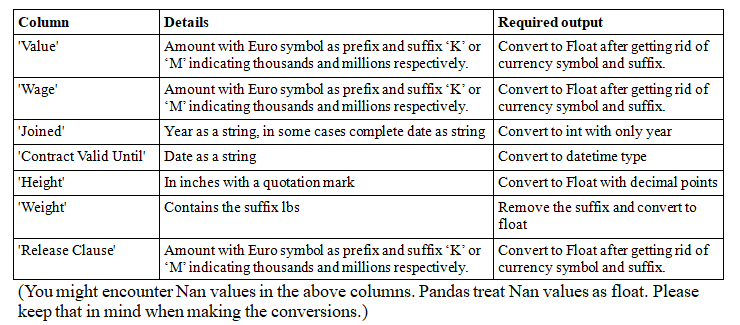

###### Converting value and wage column 

In [9]:
def convert(x):
    try:
        value= float(x[1:-1])
        suffix= x[-1]
    
        if suffix=='M':
            value= value*1000000
        elif suffix=='K':
            value= value*1000
    except:
        value=0
    return value

In [10]:
data['Value']= data['Value'].apply(convert)

In [11]:
data['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

In [12]:
data['Wage']= data['Wage'].apply(convert)

In [13]:
data['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

#### Converting joined column

In [14]:
# converting joined column to datetime, then extracting year and then filling nan value with 0 and then converting to int
data['Joined']= pd.to_datetime(data['Joined']).dt.year.fillna(0).astype('int')
data['Joined']

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int32

#### converting contract valid until column to datetime

In [15]:
data['Contract Valid Until']= pd.to_datetime(data['Contract Valid Until'])

In [16]:
data['Contract Valid Until'].value_counts()

2019-01-01    4870
2021-01-01    4360
2020-01-01    4027
2022-01-01    1477
2023-01-01    1053
2019-06-30     931
2018-01-01     886
2018-12-31     144
2019-05-31      60
2024-01-01      23
2020-06-30      14
2019-01-31      13
2025-01-01       7
2019-01-05       6
2019-01-02       6
2019-10-14       5
2019-01-12       5
2019-01-06       4
2019-12-31       3
2019-01-07       3
2019-01-25       3
2026-01-01       2
2019-12-01       2
2020-05-31       2
2018-11-30       2
2019-01-15       1
2020-02-27       1
2019-01-30       1
2019-01-11       1
2019-05-04       1
2019-01-18       1
2019-01-03       1
2019-01-04       1
2019-06-01       1
2019-01-20       1
Name: Contract Valid Until, dtype: int64

#### Converting height column

In [17]:
data['Height']

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

In [18]:
data[['heightft','heightinch']]= data['Height'].str.split("'",expand= True)  #splitting into two columns

In [19]:
data['heightft'].fillna(0, inplace= True) # treating null values
data['heightinch'].fillna(0, inplace= True)

In [20]:
data['heightft']= data['heightft'].astype('int') # converting to int to perform next operation
data['heightinch']= data['heightinch'].astype('int')

In [21]:
data['Height']= (data['heightft']*12 + data['heightinch']) # total inches

In [22]:
data['Height']= data['Height'].astype('float') # again conversion to multilpy with float value

In [23]:
data['Height']= data['Height']*2.54 # In cm 

In [24]:
data.drop(columns= ['heightft','heightinch'], inplace=True) # Unnecessary now

In [25]:
data['Height']

0        170.18
1        187.96
2        175.26
3        193.04
4        180.34
          ...  
18202    175.26
18203    190.50
18204    172.72
18205    177.80
18206    177.80
Name: Height, Length: 18207, dtype: float64

####  Converting Weight column

In [26]:
data['Weight']= data['Weight'].str.replace('lbs','').astype('float')

In [27]:
data['Weight'] 

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

#### Converting Release Clause 

In [28]:
 data['Release Clause']= data['Release Clause'].apply(convert)

In [29]:
data['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64

### 4. Check for missing values and do a mean imputation where necessary.

In [30]:
# number columns with missing values
num_cols= data.select_dtypes(include= np.number).isnull().sum().sort_values(ascending=False).head(41).index
num_cols

Index(['Jersey Number', 'SprintSpeed', 'Jumping', 'BallControl',
       'Acceleration', 'StandingTackle', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Stamina', 'FKAccuracy', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'LongPassing', 'Curve', 'Marking', 'Dribbling', 'GKReflexes',
       'GKPositioning', 'GKKicking', 'GKHandling', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'GKDiving', 'SlidingTackle', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Composure', 'ID', 'Age'],
      dtype='object')

In [31]:
# using for loop to treat missing values in number columns
for i in num_cols:
    data[i]= data[i].fillna(round(data[i].mean(),1))

In [32]:
# all the null values have been treated
data.select_dtypes(include= np.number).isnull().sum()

ID                          0
Age                         0
Overall                     0
Potential                   0
Value                       0
Wage                        0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Jersey Number               0
Joined                      0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression

# Exploratory Analysis

### 1. Plot the distribution of Overall rating for all players. 

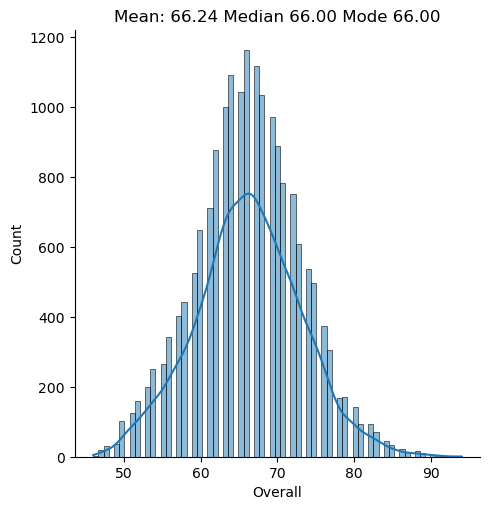

In [38]:
sns.displot(data['Overall'], kde= True)
plt.title('Mean: %.2f Median %.2f Mode %.2f'%(data['Overall'].mean(),data['Overall'].median(), data['Overall'].mode() ))
plt.show()

In [ ]:
# The overall rating is normally distributed with mean=median=mode(66).

### 2. Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


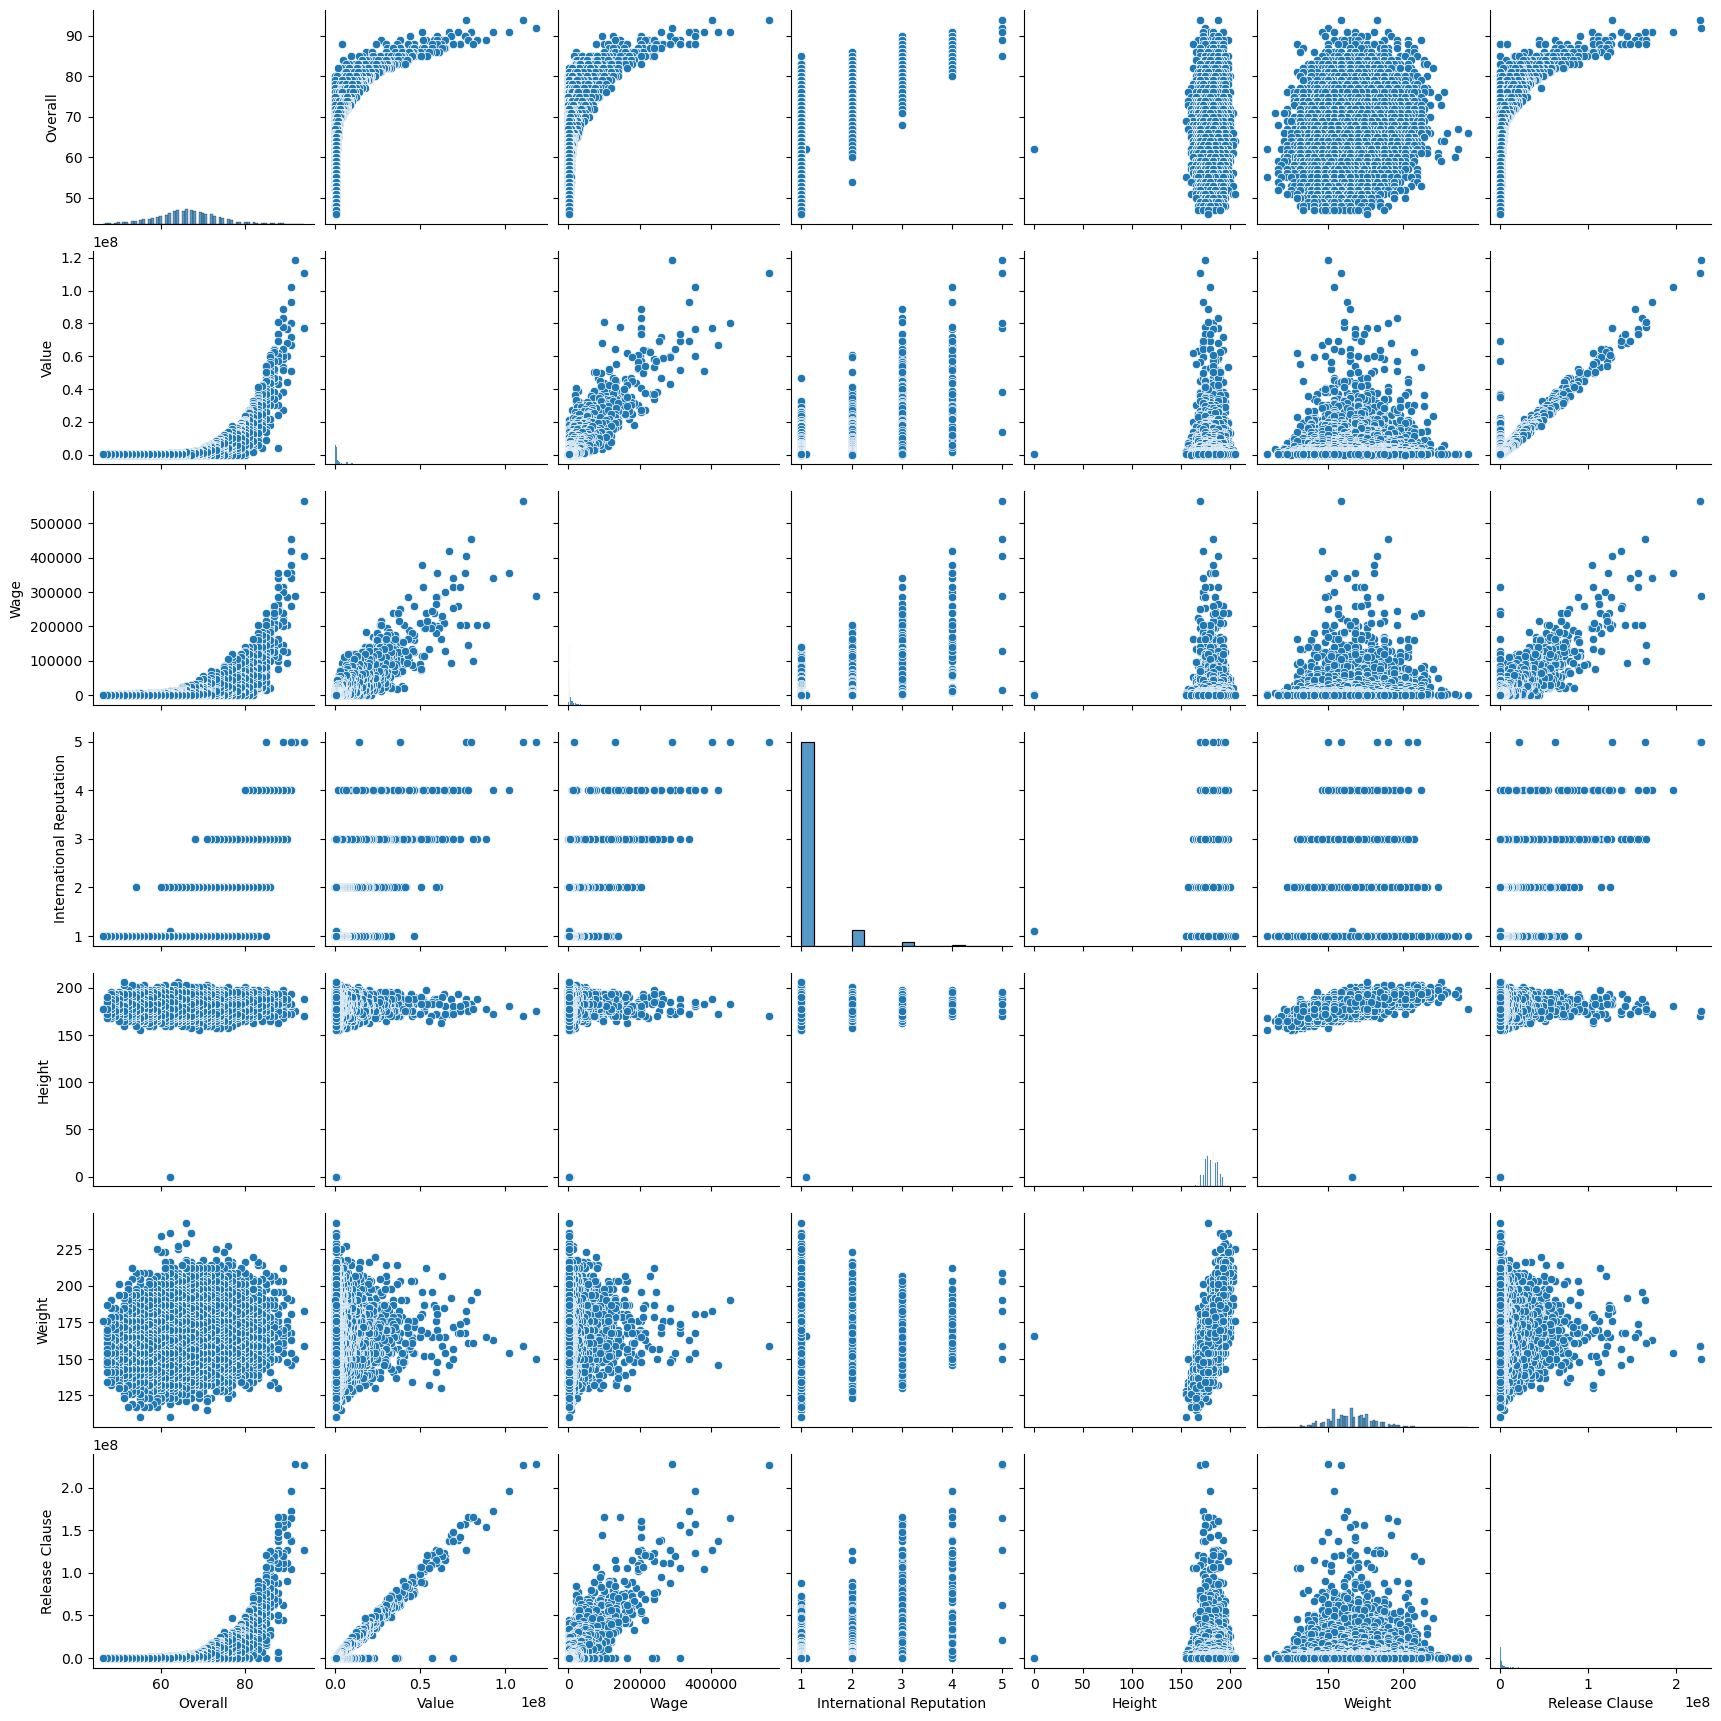

In [270]:
sns.pairplot(data[['Overall', 'Value','Wage', 'International Reputation', 'Height', 'Weight','Release Clause']])
plt.show()

* Overall rating has a non linear relationship with release clause i.e. the release value is not affected upto a certain rating (approx 70) , after which there is a steep increase in release value with increase in overall rating. 
* Similarly Overall rating has a non linear relationship with wage i.e. wage remains constant upto a certain rating (approx 60) , after which there is a steep increase in wage of player with increase in overall rating.
* Overall rating also has a non linear relationship with value i.e. value remains constant upto a certain rating (approx 70) , after which there is a steep increase in value of a player with increase in overall rating. 
* Release clause varies directly with value that is the higher the value of a player, higher will be its release value.
* Wage also has a direct relationship with release value, the higher the release clause of a player the more he will earn.
* Similarly wage is also directly related with the value i.e, the higher value will lead to a player earning more.
* Height and Weight has no effect on the overall rating, value and wage of the players.

### 3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [33]:
table= data[data['Contract Valid Until'].dt.year== 2020].sort_values('Overall', ascending= False).head(20)
table.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,2011,2020-01-01,193.04,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,4.0,4.0,High/ High,Lean,RCM,10.0,2012,2020-01-01,172.72,146.0,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,3.0,3.0,High/ Medium,Normal,RCB,15.0,2005,2020-01-01,182.88,181.0,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,2012,2020-01-01,172.72,163.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,4.0,2.0,4.0,High/ Medium,Normal,LCM,21.0,2010,2020-01-01,172.72,148.0,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0


### a) What would the average wage for this set of players be?

In [34]:
avg_wage= table['Wage'].mean()
print('Average Wage:€',avg_wage )

Average Wage:€ 205450.0


### b) What is the average age?

In [35]:
avg_age= table['Age'].mean()
print('Average Age:',avg_age)

Average Age: 30.65


### c) Is there a correlation between the Overall rating and Value for these players?

In [36]:
data[['Overall','Value']].corr()

,Overall,Value
Overall,1.000000,0.627085
Value,0.627085,1.000000


Yes, there is a low positive correlation between value and overall rating. That is value increases when overall rating 
increases but the rate of change is not constant.

### 4. Generate tables containing the top 5 players by Overall rating for each unique position.

In [276]:
data['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [277]:
tab1= data[data['Position']=='RF'][['Name','Overall']].head(5)
tab1

,Name,Overall
0,L. Messi,94
50,D. Mertens,87
528,D. Valeri,80
890,L. Podolski,78
1774,C. Ciano,75


In [278]:
tab2= data[data['Position']=='ST'][['Name','Overall']].head(5)
tab2

,Name,Overall
1,Cristiano Ronaldo,94
10,R. Lewandowski,90
16,H. Kane,89
23,S. Agüero,89
36,G. Bale,88


In [279]:
tab3= data[data['Position']=='LW'][['Name','Overall']].head(5)
tab3

,Name,Overall
2,Neymar Jr,92
29,L. Insigne,88
30,Isco,88
32,Coutinho,88
55,L. Sané,86


In [280]:
tab4= data[data['Position']=='GK'][['Name','Overall']].head(5)
tab4

,Name,Overall
3,De Gea,91
9,J. Oblak,90
18,M. ter Stegen,89
19,T. Courtois,89
22,M. Neuer,89


In [281]:
tab5= data[data['Position']=='RCM'][['Name','Overall']].head(5)
tab5

,Name,Overall
4,K. De Bruyne,91
6,L. Modrić,91
53,I. Rakitić,87
82,J. Kimmich,85
83,Saúl,85


In [282]:
tab6= data[data['Position']=='LF'][['Name','Overall']].head(5)
tab6

,Name,Overall
5,E. Hazard,91
15,P. Dybala,89
76,Iniesta,86
272,Jonathan Viera,82
1379,S. Blanco,76


In [283]:
tab7= data[data['Position']=='RS'][['Name','Overall']].head(5)
tab7

,Name,Overall
7,L. Suárez,91
109,Z. Ibrahimović,85
148,Falcao,84
267,W. Ben Yedder,82
357,S. Zaza,81


In [284]:
tab8= data[data['Position']=='RCB'][['Name','Overall']].head(5)
tab8

,Name,Overall
8,Sergio Ramos,91
39,Thiago Silva,88
54,Piqué,87
62,R. Varane,86
70,L. Bonucci,86


In [285]:
tab9= data[data['Position']=='LCM'][['Name','Overall']].head(5)
tab9

,Name,Overall
11,T. Kroos,90
13,David Silva,90
52,M. Hamšík,87
63,M. Verratti,86
114,Bruno Fernandes,84


In [286]:
tab10= data[data['Position']=='CB'][['Name','Overall']].head(5)
tab10

,Name,Overall
12,D. Godín,90
42,S. Umtiti,87
73,M. Benatia,86
89,N. Otamendi,85
102,Naldo,85


In [287]:
tab11= data[data['Position']=='LDM'][['Name','Overall']].head(5)
tab11

,Name,Overall
14,N. Kanté,89
91,Paulinho,85
119,Marquinhos,84
217,Lucas Leiva,83
323,F. de Jong,81


In [288]:
# 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM','RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'
tab12= data[data['Position']=='CAM'][['Name','Overall']].head(5)
tab12

,Name,Overall
17,A. Griezmann,89
31,C. Eriksen,88
61,Roberto Firmino,86
66,T. Müller,86
74,M. Özil,86


In [289]:
tab13= data[data['Position']=='CDM'][['Name','Overall']].head(5)
tab13

,Name,Overall
20,Sergio Busquets,89
27,Casemiro,88
72,M. Pjanić,86
75,Fernandinho,86
118,Fabinho,84


In [290]:
tab14= data[data['Position']=='LS'][['Name','Overall']].head(5)
tab14

,Name,Overall
21,E. Cavani,89
38,G. Higuaín,88
100,Diego Costa,85
151,A. Gómez,84
174,Gerard Moreno,83


In [291]:
tab15= data[data['Position']=='LCB'][['Name','Overall']].head(5)
tab15

,Name,Overall
24,G. Chiellini,89
34,M. Hummels,88
44,K. Koulibaly,87
51,J. Vertonghen,87
59,V. van Dijk,86


In [292]:
tab16= data[data['Position']=='RM'][['Name','Overall']].head(5)
tab16

,Name,Overall
25,K. Mbappé,88
26,M. Salah,88
122,F. Thauvin,84
137,José Callejón,84
138,A. Di María,84


In [293]:
tab17= data[data['Position']=='LAM'][['Name','Overall']].head(5)
tab17

,Name,Overall
28,J. Rodríguez,88
365,D. Tadić,81
1587,Fabrio Farinha,75
2247,Leo Caldeirinha,74
2342,Nicolás Formido,74


In [294]:
tab18= data[data['Position']=='LM'][['Name','Overall']].head(5)
tab18

,Name,Overall
33,P. Aubameyang,88
58,S. Mané,86
65,Douglas Costa,86
68,M. Reus,86
86,Koke,85


In [295]:
tab19= data[data['Position']=='LB'][['Name','Overall']].head(5)
tab19

,Name,Overall
35,Marcelo,88
49,Jordi Alba,87
64,Alex Sandro,86
85,D. Alaba,85
106,Filipe Luís,85


In [296]:
tab20= data[data['Position']=='RDM'][['Name','Overall']].head(5)
tab20

,Name,Overall
45,P. Pogba,87
134,Illarramendi,84
198,I. Gueye,83
223,D. De Rossi,83
298,M. Parolo,82


In [297]:
tab21= data[data['Position']=='RW'][['Name','Overall']].head(5)
tab21

,Name,Overall
56,Bernardo Silva,86
60,R. Sterling,86
79,Marco Asensio,85
84,R. Mahrez,85
93,A. Sánchez,85


In [298]:
tab22= data[data['Position']=='CM'][['Name','Overall']].head(5)
tab22

,Name,Overall
67,Thiago,86
78,S. Milinković-Savić,85
121,Jorginho,84
136,I. Gündoğan,84
161,N. Keïta,83


In [299]:
tab23= data[data['Position']=='RB'][['Name','Overall']].head(5)
tab23

,Name,Overall
69,Azpilicueta,86
123,Carvajal,84
135,K. Walker,84
192,Sergi Roberto,83
216,L. Bender,83


In [300]:
tab24= data[data['Position']=='RAM'][['Name','Overall']].head(5)
tab24

,Name,Overall
129,J. Cuadrado,84
171,H. Ziyech,83
1705,Allan Bardinho,75
2242,Jacson Zonta,74
2322,Sebas Couteira,74


In [301]:
tab25= data[data['Position']=='CF'][['Name','Overall']].head(5)
tab25

,Name,Overall
271,Luis Alberto,82
293,S. Giovinco,82
350,A. Milik,81
382,L. Stindl,81
407,Raffael,81


In [302]:
tab26= data[data['Position']=='RWB'][['Name','Overall']].head(5)
tab26

,Name,Overall
450,M. Ginter,80
465,P. Kadeřábek,80
517,S. Coleman,80
652,D. Caligiuri,79
766,Pablo Maffeo,78


In [303]:
tab27= data[data['Position']=='LWB'][['Name','Overall']].head(5)
tab27

,Name,Overall
474,N. Schulz,80
581,Granell,79
601,Jonny,79
605,J. Hector,79
787,J. Mojica,78


### a) Are there any players appearing in more than one Table. Please point out such players.

In [304]:
from functools import reduce
reduce(np.intersect1d,(dict(tab1)['Name'].values, dict(tab2)['Name'].values, dict(tab3)['Name'].values, dict(tab4)['Name'].values,
                       dict(tab5)['Name'].values, dict(tab6)['Name'].values, dict(tab7)['Name'].values, dict(tab8)['Name'].values,
                       dict(tab9)['Name'].values, dict(tab10)['Name'].values, dict(tab11)['Name'].values, dict(tab12)['Name'].values,
                       dict(tab13)['Name'].values, dict(tab14)['Name'].values, dict(tab15)['Name'].values, dict(tab16)['Name'].values,
                       dict(tab17)['Name'].values, dict(tab18)['Name'].values, dict(tab19)['Name'].values, dict(tab20)['Name'].values, 
                       dict(tab21)['Name'].values, dict(tab22)['Name'].values, dict(tab23)['Name'].values, dict(tab24)['Name'].values,
                       dict(tab25)['Name'].values, dict(tab26)['Name'].values, dict(tab27)['Name'].values))

array([], dtype=object)

There are no duplicate players in all tables.

### b)	What is the average wage one can expect to pay for the top 5 in every position?

In [306]:
data_sorted= data.groupby('Position').apply(lambda x:x.sort_values('Overall', ascending= False ).head(5))
data_sorted

ID               Name  Age Nationality  Overall  Potential  \
Position                                                                      
CAM      17  194765       A. Griezmann   27      France       89         90   
         31  190460         C. Eriksen   26     Denmark       88         91   
         61  201942    Roberto Firmino   26      Brazil       86         87   
         66  189596          T. Müller   28     Germany       86         86   
         74  176635            M. Özil   29     Germany       86         86   
...             ...                ...  ...         ...      ...        ...   
ST       1    20801  Cristiano Ronaldo   33    Portugal       94         94   
         10  188545     R. Lewandowski   29      Poland       90         90   
         16  202126            H. Kane   24     England       89         91   
         23  153079          S. Agüero   30   Argentina       89         89   
         36  173731            G. Bale   28       Wales       88         88   

                          Club       Value      Wage Preferred Foot  \
Position                                                              
CAM      17    Atlético Madrid  78000000.0  145000.0           Left   
         31  Tottenham Hotspur  73500000.0  205000.0          Right   
         61          Liverpool  53000000.0  195000.0          Right   
         66  FC Bayern München  45000000.0  135000.0          Right   
         74            Arsenal  43500000.0  190000.0           Left   
...                        ...         ...       ...            ...   
ST       1            Juventus  77000000.0  405000.0          Right   
         10  FC Bayern München  77000000.0  205000.0          Right   
         16  Tottenham Hotspur  83500000.0  205000.0          Right   
         23    Manchester City  64500000.0  300000.0          Right   
         36        Real Madrid  60000000.0  355000.0           Left   

             International Reputation  Weak Foot  Skill Moves     Work Rate  \
Position                                                                      
CAM      17                       4.0        3.0          4.0    High/ High   
         31                       3.0        5.0          4.0  High/ Medium   
         61                       3.0        4.0          4.0    High/ High   
         66                       4.0        4.0          3.0    High/ High   
         74                       4.0        2.0          4.0   Medium/ Low   
...                               ...        ...          ...           ...   
ST       1                        5.0        4.0          5.0     High/ Low   
         10                       4.0        4.0          4.0  High/ Medium   
         16                       3.0        4.0          3.0    High/ High   
         23                       4.0        4.0          4.0  High/ Medium   
         36                       4.0        3.0          4.0  High/ Medium   

              Body Type Position  Jersey Number  Joined Contract Valid Until  \
Position                                                                       
CAM      17        Lean      CAM            7.0    2014           2023-01-01   
         31        Lean      CAM           10.0    2013           2020-01-01   
         61        Lean      CAM            9.0    2015           2023-01-01   
         66        Lean      CAM           13.0    2008           2021-01-01   
         74        Lean      CAM           10.0    2013           2021-01-01   
...                 ...      ...            ...     ...                  ...   
ST       1   C. Ronaldo       ST            7.0    2018           2022-01-01   
         10      Normal       ST            9.0    2014           2021-01-01   
         16      Normal       ST            9.0    2010           2024-01-01   
         23      Stocky       ST           10.0    2011           2021-01-01   
         36        Lean       ST           11.0    2013           2022-01-01 

In [307]:
cat= data_sorted['Position'].unique()
cat

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object)

In [314]:
for i in cat:
    print('Average Wage for',i,'is:€',data_sorted[data_sorted['Position']==i]['Wage'].mean())

Average Wage for CAM is:€ 174000.0
Average Wage for CB is:€ 139600.0
Average Wage for CDM is:€ 217000.0
Average Wage for CF is:€ 47400.0
Average Wage for CM is:€ 130600.0
Average Wage for GK is:€ 192800.0
Average Wage for LAM is:€ 81600.0
Average Wage for LB is:€ 177200.0
Average Wage for LCB is:€ 162000.0
Average Wage for LCM is:€ 184400.0
Average Wage for LDM is:€ 126600.0
Average Wage for LF is:€ 121200.0
Average Wage for LM is:€ 164600.0
Average Wage for LS is:€ 130200.0
Average Wage for LW is:€ 261000.0
Average Wage for LWB is:€ 34200.0
Average Wage for RAM is:€ 45400.0
Average Wage for RB is:€ 155400.0
Average Wage for RCB is:€ 231000.0
Average Wage for RCM is:€ 240800.0
Average Wage for RDM is:€ 105000.0
Average Wage for RF is:€ 148000.0
Average Wage for RM is:€ 131400.0
Average Wage for RS is:€ 132200.0
Average Wage for RW is:€ 202000.0
Average Wage for RWB is:€ 44200.0
Average Wage for ST is:€ 294000.0
